#### Path where the Spark Client is Installed

In [1]:
print("#################The place where the Spark is installed #####################")

!ls /usr/hdp/current/spark2-client/


print("####################The place where the PySpark and py4j is located#########################")

!ls /usr/hdp/current/spark2-client/python/lib

print("##################################################################################")



#################The place where the Spark is installed #####################
aux  conf  doc	     jars     licenses	python	README.md  sbin  yarn
bin  data  examples  LICENSE  NOTICE	R	RELEASE    work
####################The place where the PySpark and py4j is located#########################
py4j-0.10.6-src.zip  PY4J_LICENSE.txt  pyspark.zip
##################################################################################


#### Libraries that help to start Pyspark
* There are two libraries that help to start the pyspark application that are present in the python/lib folder
* pyspark.zip package which has the functionalities of Spark 
* SparkContext uses other package Py4J to launch a JVM and creates a JavaSparkContext object which ultimately communicates with the Spark executor JVMs to load required data

When PySpark's Python interpreter starts, it also starts a JVM with which it communicates through a socket. PySpark uses the Py4J project to handle this communication. The JVM functions as the actual Spark driver, and loads a JavaSparkContext that communicates with the Spark executors across the cluster

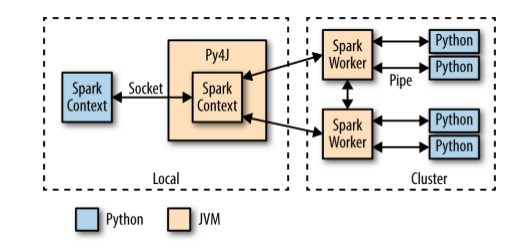

In [2]:
import findspark

In [3]:
findspark.init("/usr/hdp/current/spark2-client")

#### Spark Context
* __SparkContext__ is the entry point of Spark functionality.
* To run any Spark Application a driver program starts, which has the main function and your SparkContext gets initiated here
* It allows your Spark Application to access Spark Cluster with the help of any Resource Manager(Spark Standalone,Yarn)

* If you want to create SparkContext, first __SparkConf__ object should be created.The SparkConf object has a configuration parameter that our Spark driver application will pass to SparkContext. 
* Some of these parameter defines properties of Spark driver application. 
* Some are used by Spark to allocate resources on the cluster, like the number, memory size, and cores used by executor running on the worker nodes.


#### So to invoke the functionality of the SparkContext which requires SparkConf we need to imort the required methods from pyspark class

In [4]:
from pyspark import SparkContext,SparkConf

In [5]:
conf = SparkConf().setAppName("PySpark RDD  Intro").setMaster('local[*]')

In [6]:
conf.getAll()

[('spark.master', u'local[*]'), ('spark.app.name', u'PySpark RDD  Intro')]

In [7]:
sc = SparkContext(conf=conf)

In [8]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

* Spark introduces the concept of an RDD (Resilient Distributed Dataset), an
 immutable fault-tolerant, distributed collection of objects that can be operated on
 in parallel. 

* An RDD can contain any type of object and is created by loading an
 external dataset or distributing a collection from the driver program.

### Creating RDD in Pyspark

#####  There are three ways to create an RDD in Spark.

* Parallelizing already existing collection in driver program.
* Referencing a dataset in an external storage system (e.g. HDFS, Hbase, shared file system).
* Creating RDD from already existing RDDs.

In [9]:
data = range(1,101)

In [10]:
type(data)

list

In [11]:
data_RDD = sc.parallelize(data,10)

In [12]:
type(data_RDD)

pyspark.rdd.RDD

In [13]:
data = [("maths",52),("english",75),("science",82), ("computer",65),("maths",85)]

In [14]:
rdd1 = sc.parallelize(data)

In [16]:
type(rdd1)

pyspark.rdd.RDD

In [17]:
rdd1.collect()

[('maths', 52),
 ('english', 75),
 ('science', 82),
 ('computer', 65),
 ('maths', 85)]

In [24]:
rdd2 = sc.textFile("file:///home/mahidharv/temp_data.txt") 

In [25]:
rdd2.collect()

[u'1901\t-78\t1',
 u'1901\t-72\t1',
 u'1901\t-94\t1',
 u'1901\t-61\t1',
 u'1901\t-56\t1',
 u'1901\t-28\t1',
 u'1901\t-67\t1',
 u'1901\t-33\t1',
 u'1901\t-28\t1',
 u'1901\t-33\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t0\t1',
 u'1901\t6\t1',
 u'1901\t0\t1',
 u'1901\t6\t1',
 u'1901\t6\t1',
 u'1901\t-11\t1',
 u'1901\t-33\t1',
 u'1901\t-50\t1',
 u'1901\t-44\t1',
 u'1901\t-28\t1',
 u'1901\t-33\t1',
 u'1901\t-33\t1',
 u'1901\t-50\t1',
 u'1901\t-33\t1',
 u'1901\t-28\t1',
 u'1901\t-44\t1',
 u'1901\t-44\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-50\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-33\t1',
 u'1901\t-22\t1',
 u'1901\t0\t1',
 u'1901\t-6\t1',
 u'1901\t-17\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-33\t1',
 u'1901\t-6\t1',
 u'1901\t17\t1',
 u'1901\t22\t1',
 u'1901\t28\t1',
 u'1901\t28\t1',
 u'1901\t11\t1',
 u'1901\t-17\t1',
 u'1901\t-28\t1',
 u'1901\t-56\t1',
 u'1901\t-44\t1',
 u'1901\t-44\t1',
 u'1901\t-67\t1',
 u'1901\t-44\t1',
 u'1901\t-39\t1',
 u'1901\t-2

In [27]:
type(rdd2)

pyspark.rdd.RDD

In [33]:
RDD = sc.textFile("/user/mahidharv/phd")

In [36]:
RDD.take(1)

[u'"ROW_ID","CASE_STATUS","EMPLOYER_NAME","SOC_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","WORKSITE","lon","lat"']

### RDDs support two types of operations:
* Transformations are operations (such as map, filter, join, union, and so on) that are performed on an RDD and which yield a new RDD containing the result.

* Actions are operations (such as reduce, count, first, and so on) that return a value after running a computation on an RDD.

* Transformations in Spark are “lazy”, meaning that they do not compute their results right away. 
* They just “remember” the operation to be performed and the dataset (e.g., file) to which the operation is to be    performed. 
* The transformations are only actually computed when an action is called and the result is returned to the driver program. 
* This design enables Spark to run more efficiently. For example, if a big file was transformed in various ways and passed to first action, Spark would only process and return the result for the first line, rather than do the work for the entire file.

### Transformations

* Map Transformation

In [41]:
intRdd = sc.parallelize([10, 20, 30, 40, 50])

In [42]:
mapRDD = intRdd.map(lambda x : x**2)
mapRDD.collect()

[100, 400, 900, 1600, 2500]

* Filter(Transformation):
    
* The filter operation evaluates a Boolean function for each data item of the RDD
 and puts the items for which the function returned true into the resulting RDD. Filter
 is a Transformation. Collect is an Action.

In [43]:
numRdd = sc.parallelize([11,12,13,14,15,16,17,18])
filterRdd1 = numRdd.filter(lambda x : x%2 == 1)
filterRdd1.collect()

[11, 13, 15, 17]

In [44]:
filterRdd2 = numRdd.filter(lambda x : x%2 == 0)
filterRdd2.collect()

[12, 14, 16, 18]

* ReduceByKey (Transformation):
* Spark RDD reduceByKey function merges the values for each key using an associative reduce function. Basically reduceByKey function works only for RDDs which contains key and value pairs kind of elements (i.e. RDDs having tuple or Map as a data element).

In [45]:
x = sc.parallelize([("comp", 1), ("tab", 1), ("comp", 1), ("comp", 1),
("tab", 1), ("tab", 1), ("tab", 1), ("tab", 1)])

In [46]:
x.collect()

[('comp', 1),
 ('tab', 1),
 ('comp', 1),
 ('comp', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1),
 ('tab', 1)]

In [47]:
y = x.reduceByKey(lambda a, b: a + b)

In [48]:
y.collect()

[('comp', 3), ('tab', 5)]

* flatMap (Transformation) :
* Spark flatMap function returns a new RDD by first applying a function to all elements of this RDD, and then flattening the results.

In [49]:
sc.parallelize([3,4,5]).map(lambda x: range(1,x)).collect()

[[1, 2], [1, 2, 3], [1, 2, 3, 4]]

In [50]:
sc.parallelize([3,4,5]).flatMap(lambda x: range(1,x)).collect()

[1, 2, 1, 2, 3, 1, 2, 3, 4]

In [54]:
sentRdd = sc.parallelize(["Welcome to Batch 56.", "This is Lab Session","We are doing pySpark Activity"])

In [55]:
sentRdd.map(lambda x: x.split(' ')).collect()

[['Welcome', 'to', 'Batch', '56.'],
 ['This', 'is', 'Lab', 'Session'],
 ['We', 'are', 'doing', 'pySpark', 'Activity']]

In [56]:
wordlist = sentRdd.flatMap(lambda x: x.split(' ')).collect()

In [57]:
type(wordlist)

list

In [58]:
wordlist

['Welcome',
 'to',
 'Batch',
 '56.',
 'This',
 'is',
 'Lab',
 'Session',
 'We',
 'are',
 'doing',
 'pySpark',
 'Activity']

* groupByKey(Transformation):
* Spark groupByKey function returns a new RDD. The returned RDD gives back an object which allows to iterate over the results. The results of groupByKey returns a list by calling list() on values.

In [59]:
example = sc.parallelize([('x',1), ('x',1), ('y', 1), ('z', 1)])

In [60]:
example.collect()

[('x', 1), ('x', 1), ('y', 1), ('z', 1)]

In [61]:
example.groupByKey().collect()

[('y', <pyspark.resultiterable.ResultIterable at 0x3981d90>),
 ('x', <pyspark.resultiterable.ResultIterable at 0x39814d0>),
 ('z', <pyspark.resultiterable.ResultIterable at 0x39811d0>)]

In [62]:
itRdd = example.groupByKey()

In [63]:
itRdd.map(lambda x :(x[0], list(x[1]))).collect()

[('y', [1]), ('x', [1, 1]), ('z', [1])]

* groupBy (Transformation) :
* groupBy function returns an RDD of grouped items. This operation will return the new RDD which basically is made up with a KEY (which is a group) and list of items of that group (in a form of Iterator). Order of element within the group may not same when you apply the same operation on the same RDD over and over.

In [64]:
namesRdd = sc.parallelize(["Joseph", "Jimmy", "Tina","Thomas","James","Cory","Christine", "Jackeline", "Juan"])

In [65]:
namesRdd.collect()

['Joseph',
 'Jimmy',
 'Tina',
 'Thomas',
 'James',
 'Cory',
 'Christine',
 'Jackeline',
 'Juan']

In [66]:
result =namesRdd.groupBy(lambda word: word[0]).collect()

In [67]:
result

[('C', <pyspark.resultiterable.ResultIterable at 0x3986990>),
 ('J', <pyspark.resultiterable.ResultIterable at 0x3986510>),
 ('T', <pyspark.resultiterable.ResultIterable at 0x39866d0>)]

In [68]:
[(x, sorted(y)) for (x, y) in result]

[('C', ['Christine', 'Cory']),
 ('J', ['Jackeline', 'James', 'Jimmy', 'Joseph', 'Juan']),
 ('T', ['Thomas', 'Tina'])]

* mapValues (Transformation) :
* Apply a function to each value of a pair RDD without changing the key.

In [69]:
namesRdd = sc.parallelize(["dog", "tiger", "lion", "cat", "panther","eagle"])
pairRdd = namesRdd.map(lambda x :(len(x), x))

In [70]:
pairRdd.collect()

[(3, 'dog'),
 (5, 'tiger'),
 (4, 'lion'),
 (3, 'cat'),
 (7, 'panther'),
 (5, 'eagle')]

In [71]:
result = pairRdd.mapValues(lambda y: "Animal name is " + y)
result.collect()

[(3, 'Animal name is dog'),
 (5, 'Animal name is tiger'),
 (4, 'Animal name is lion'),
 (3, 'Animal name is cat'),
 (7, 'Animal name is panther'),
 (5, 'Animal name is eagle')]

* join (pair Rdd Transformation): 

In [72]:
rdd1 = sc.parallelize([("red",20),("red",30),("blue", 100)])
rdd2 = sc.parallelize([("red",40),("red",50),("yellow", 10000)])

In [73]:
rdd1.join(rdd2).collect()

[('red', (20, 40)), ('red', (20, 50)), ('red', (30, 40)), ('red', (30, 50))]

* inner join and outer join (Transformation)

In [74]:
rdd1 = sc.parallelize([("Mercedes", "E-Class"), ("Toyota", "Corolla"),("Renault", "Duster")])
rdd2 = sc.parallelize([("Mercedes", "C-Class"), ("Toyota", "Prius"),("Toyota", "Etios")])

In [75]:
innerJoinRdd = rdd1.join(rdd2)
innerJoinRdd.collect()

[('Mercedes', ('E-Class', 'C-Class')),
 ('Toyota', ('Corolla', 'Prius')),
 ('Toyota', ('Corolla', 'Etios'))]

In [76]:
outerJoinRdd = rdd1.leftOuterJoin(rdd2)
outerJoinRdd.collect()

[('Renault', ('Duster', None)),
 ('Mercedes', ('E-Class', 'C-Class')),
 ('Toyota', ('Corolla', 'Prius')),
 ('Toyota', ('Corolla', 'Etios'))]

* Union:
* Combines the values in various Rdds to form a cohesive unit

In [77]:
d1= [('k1', 1), ('k2', 2), ('k3', 5)]
d2= [('k1', 3), ('k2',4), ('k4', 8)]

In [78]:
d1_RDD = sc.parallelize(d1)
d2_RDD = sc.parallelize(d2)

In [79]:
d3_union = d1_RDD.union(d2_RDD)

In [80]:
d3_union.collect()

[('k1', 1), ('k2', 2), ('k3', 5), ('k1', 3), ('k2', 4), ('k4', 8)]

## Actions

* collect (Action):
* Collect action returns the results or the value. When an action is called transformations are executed.

In [81]:
rdd1 = sc.textFile('/user/mahidharv/input.txt')

In [82]:
rdd1.collect()

[u'"Hello Batch"', u'"How are you doing"', u'"Hope All is Well"']

In [83]:
rdd1.first()

u'"Hello Batch"'

In [84]:
rdd1.take(2)

[u'"Hello Batch"', u'"How are you doing"']

* takeOrdered(Action):
* Orders the data items of the RDD using their inherent implicit ordering function and returns the first n items as an array.

In [85]:
rdd1 = sc.parallelize(["dog", "cat", "ape", "salmon", "gnu"])
rdd1.takeOrdered(3)

['ape', 'cat', 'dog']

* reduce (Action):
* This function provides the well-known reduce functionality in Spark. Please note that any function f you provide, should be commutative in order to generate reproducible results.

In [86]:
intVals = range(1,15)
numRdd = sc.parallelize(intVals)
cSum = numRdd.reduce(lambda a, b: a + b)

In [87]:
cSum

105

* Broadcast Variables

In [88]:
my_collection = "Postgraduate Program in Big Data Analytics and Optimization"\
  .split(" ")
    
words = sc.parallelize(my_collection)

In [89]:
words.getNumPartitions()

8

In [90]:
supplementalData = {"Postgraduate":1000, "Analytics":200, "Optimization": 400,
                    "Big":-300, "Data": 100, "Program":100}

In [91]:
suppBroadcast = sc.broadcast(supplementalData)

In [92]:
suppBroadcast.value

{'Analytics': 200,
 'Big': -300,
 'Data': 100,
 'Optimization': 400,
 'Postgraduate': 1000,
 'Program': 100}

In [93]:
words.map(lambda word: (word, suppBroadcast.value.get(word, 0))).collect()

[('Postgraduate', 1000),
 ('Program', 100),
 ('in', 0),
 ('Big', -300),
 ('Data', 100),
 ('Analytics', 200),
 ('and', 0),
 ('Optimization', 400)]

In [94]:
words.map(lambda word: (word, suppBroadcast.value.get(word, 0)))\
  .sortBy(lambda wordPair: wordPair[1])\
  .collect()

[('Big', -300),
 ('in', 0),
 ('and', 0),
 ('Program', 100),
 ('Data', 100),
 ('Analytics', 200),
 ('Optimization', 400),
 ('Postgraduate', 1000)]

* Accumulators

In [95]:
count = sc.accumulator(0)

In [96]:
count.value

0

In [97]:
result = sc.parallelize([1,2,3])

In [98]:
def f(x):
    global count
    count += x

In [99]:
result.foreach(f)

In [100]:
count.value

6

#### Some more transformation  and actions

* glom() - Return an RDD created by coalescing all elements within each partition into a list.

In [101]:
data_RDD.glom().collect()

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
 [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
 [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
 [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
 [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
 [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
 [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]]

* coalesce() - Return a new RDD that is reduced into numPartitions partitions.

In [103]:
RDD = RDD.coalesce(2)
RDD.glom().collect()

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

* repartition() - Return a new RDD that has exactly numPartitions partitions.

- Can increase or decrease the level of parallelism in this RDD. Internally, this uses a shuffle to redistribute data. If you are decreasing the number of partitions in this RDD, consider using coalesce, which can avoid performing a shuffle

In [104]:
RDD_par = RDD.repartition(2)
RDD_par.glom().collect()

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 22, 23, 24, 25, 26, 27, 28, 29],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]

* combineByKey(createCombiner,mergeValue,mergeCombiners)

In [116]:
nums = [(1,2),(3,4),(3,6)]
numsRDD = sc.parallelize(nums,3)
numsRDD.glom().collect()

[[(1, 2)], [(3, 4)], [(3, 6)]]

In [117]:
sumCount = numsRDD.combineByKey(createCombiner=lambda x :(x,1),mergeValue=lambda x,y:(x[0]+y,x[1]+1),mergeCombiners=lambda x,y:(x[0]+y[0],x[1]+y[1]),numPartitions=3)

In [118]:
sumCount.collect()

[(3, (10, 2)), (1, (2, 1))]

#### Creating Custom Partitioner

In [129]:
transactions = [
    {'name': 'Bob', 'amount': 100, 'country': 'United Kingdom'},
    {'name': 'James', 'amount': 15, 'country': 'United Kingdom'},
    {'name': 'Marek', 'amount': 51, 'country': 'Poland'},
    {'name': 'Paul', 'amount': 75, 'country': 'Poland'},
]

In [130]:
def country_partitioner(country):
    return hash(country)

In [131]:
country_partitioner('United Kingdom')

4664476656719736304

In [132]:
rdd = sc.parallelize(transactions) \
        .map(lambda el: (el['country'], el)) \
        .partitionBy(4, country_partitioner)
print("##################################################################################")    
print("Number of partitions: {}".format(rdd.getNumPartitions()))
print("##################################################################################")
print("Partitioner: {}".format(rdd.partitioner))
print("##################################################################################")
print("Partitions structure: {}".format(rdd.glom().collect()))
print("##################################################################################")
[i for i in rdd.glom().collect()]

##################################################################################
Number of partitions: 4
##################################################################################
Partitioner: <pyspark.rdd.Partitioner object at 0x39fed90>
##################################################################################
Partitions structure: [[('United Kingdom', {'country': 'United Kingdom', 'amount': 100, 'name': 'Bob'}), ('United Kingdom', {'country': 'United Kingdom', 'amount': 15, 'name': 'James'})], [], [('Poland', {'country': 'Poland', 'amount': 51, 'name': 'Marek'}), ('Poland', {'country': 'Poland', 'amount': 75, 'name': 'Paul'})], []]
##################################################################################


[[('United Kingdom',
   {'amount': 100, 'country': 'United Kingdom', 'name': 'Bob'}),
  ('United Kingdom',
   {'amount': 15, 'country': 'United Kingdom', 'name': 'James'})],
 [],
 [('Poland', {'amount': 51, 'country': 'Poland', 'name': 'Marek'}),
  ('Poland', {'amount': 75, 'country': 'Poland', 'name': 'Paul'})],
 []]

####  Activity

In [108]:
textdata =sc.textFile('file:///home/mahidharv/academics/Batch56/CSE7322c/20190411_Batch56_CSE7322c_Lab02_SparkRDD_MR_SQL/textData/washingtonData.txt')

In [109]:
textdata.collect()

[u"The Washington National Opera was established in 1957 as the Opera Society of Washington by Day Thorpe, the music critic of the now defunct Washington Star, but then the most influential Washington newspaper of its day. Paul Callaway, the choirmaster and organist of the Washington National Cathedral, was its first music director. Together, the two set out to seek funding and they found support from Gregory and Peggy Smith who provided $10,000 as seed money for a production of Mozart's Die Entf\xfchrung aus dem Serail which would be performed following the end of their summer season (which Calloway conducted) by the Washington Symphony Orchestra.",
 u'',
 u'Characteristic of Thorpe and Calloway\'s early years was a rejection of cuts to the scores, a rejection of opera in English, and a rejection of expensive scenery as well as of "fat sopranos" and "self-centered tenors".[2]',
 u'',
 u'The pair set out to seek a new public and, beginning with the first production of Die Entf\xfchrung

In [110]:
word_tokens = textdata.flatMap(lambda line: line.split(' '))\
                        .map(lambda word: (word, 1))\
                        .reduceByKey(lambda a, b: a + b) 

In [111]:
word_tokens.collect()

[(u'', 6),
 (u'when', 1),
 (u'Smith', 1),
 (u'not', 1),
 (u"'company'", 1),
 (u"Calloway's", 1),
 (u'White', 1),
 (u'Fe.', 1),
 (u'time,', 1),
 (u'ballet', 1),
 (u'Stravinsky', 4),
 (u'had', 4),
 (u'onwards:', 1),
 (u'aus', 1),
 (u'follow.', 1),
 (u'years,', 1),
 (u'regularly', 2),
 (u'"Capital', 1),
 (u'Magic', 2),
 (u'Santa', 2),
 (u'very', 1),
 (u'downs', 1),
 (u'early', 3),
 (u'1957', 2),
 (u'English,', 1),
 (u'they', 1),
 (u'press', 1),
 (u'Old', 1),
 (u'However,', 4),
 (u'bringing', 1),
 (u'opera', 5),
 (u'venue', 1),
 (u'"There', 1),
 (u'Four', 1),
 (u"singers'", 1),
 (u'Cathedral,', 1),
 (u'small', 1),
 (u'Paul', 2),
 (u'Carlo', 1),
 (u'A', 1),
 (u'financial', 1),
 (u'Washington', 8),
 (u"University's", 1),
 (u'some', 1),
 (u'Some', 1),
 (u'1960s', 1),
 (u"Callaway's", 1),
 (u'Auditorium,', 1),
 (u'Serail', 1),
 (u'excerpts', 1),
 (u'funding', 1),
 (u'for', 2),
 (u'Successful', 1),
 (u'day.', 1),
 (u'arranged', 1),
 (u'Manticore.', 1),
 (u'expensive', 1),
 (u'illnesses.', 1),
 

In [112]:
# displaying the number of words
word_tokens.count()

293

In [113]:
# Sorting the words and count based on key
sorted = word_tokens.sortByKey(ascending=True)

In [114]:
sorted.collect()

[(u'', 6),
 (u'"Capital', 1),
 (u'"Sparkle', 2),
 (u'"There', 1),
 (u'"a', 1),
 (u'"fat', 1),
 (u'"ill-starred"', 1),
 (u'"self-centered', 1),
 (u'"the', 1),
 (u'$10,000', 1),
 (u"'company'", 1),
 (u'(along', 1),
 (u'(conducted', 1),
 (u'(which', 1),
 (u'-', 2),
 (u'1956', 1),
 (u'1957', 2),
 (u'1957,', 1),
 (u'1958', 1),
 (u'1960s', 1),
 (u'1960s.', 1),
 (u'1961', 1),
 (u'1966', 1),
 (u'31', 1),
 (u'A', 1),
 (u'Administrator', 1),
 (u'Ariadne', 1),
 (u'Artistic', 1),
 (u'Auditorium,', 1),
 (u'Bliss', 1),
 (u'But', 1),
 (u'By', 1),
 (u"Callaway's", 1),
 (u'Callaway,', 1),
 (u'Calloway', 1),
 (u"Calloway's", 1),
 (u'Carlo', 1),
 (u'Cathedral,', 1),
 (u'Characteristic', 1),
 (u'Day', 1),
 (u'December', 2),
 (u'Die', 2),
 (u'Each', 1),
 (u'English,', 1),
 (u'English-language', 1),
 (u'Entf\xfchrung', 2),
 (u'Erwartung', 1),
 (u'Erwartung)', 1),
 (u'Fe', 1),
 (u'Fe.', 1),
 (u'Fidelio;', 1),
 (u'Flute', 2),
 (u'Four', 1),
 (u'George', 1),
 (u'Gian', 1),
 (u'Gorgon,', 1),
 (u'Gregory', 1),
 